In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [3]:
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

In [5]:
X,y = mnist['data'], mnist['target']

In [7]:
y = y.astype(int)

In [9]:
X.shape

(70000, 784)

In [11]:
y.shape

(70000,)

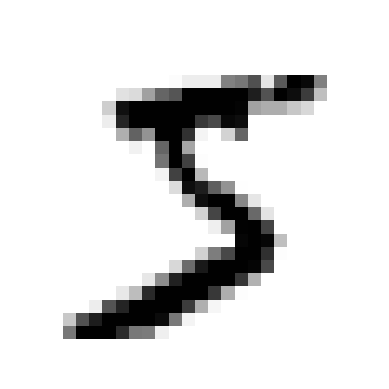

Label : 5


In [13]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()

print(f"Label : {y[0]}")

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(X_train.shape,X_test.shape)

(56000, 784) (14000, 784)


In [17]:
#Train a Binary Classifier(Digit '5' vs Not '5')
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [19]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)


SGDClassifier(random_state=42)

In [21]:
sgd_clf.predict([some_digit])

array([False])

In [23]:
#Evaluate model performance
from sklearn.model_selection import cross_val_score
scores = cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring="accuracy")
print("Cross-validation accuracy:",scores)

Cross-validation accuracy: [0.97192907 0.96855413 0.96024858]


In [29]:
#Performance Metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix,precision_score, recall_score,f1_score

In [31]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
y_train_pred

array([ True, False,  True, ..., False, False, False])

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_train_5,y_train_pred))

Confusion Matrix:
[[50287   673]
 [ 1180  3860]]


In [35]:
#Precision recall and F1 score
precision = precision_score(y_train_5,y_train_pred)
precision

0.8515332009706597

In [37]:
recall = recall_score(y_train_5,y_train_pred)
recall

0.7658730158730159

In [39]:
f1 = f1_score(y_train_5,y_train_pred)
f1

0.8064347644416588

In [41]:
#Precision-Recall Tradeoff
from sklearn.metrics import precision_recall_curve 


In [43]:
y_scores= cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
y_scores

array([  2620.11888047, -21468.63800421,    732.41439205, ...,
        -9619.64253191, -12620.86414512, -14196.89329626])

In [49]:
precisions, recalls, thresholds =precision_recall_curve(y_train_5,y_scores)

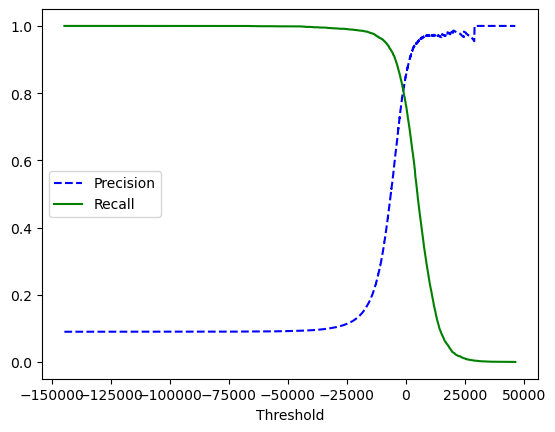

In [57]:

plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
plt.xlabel('Threshold')
plt.legend(loc='best')
plt.show()

In [59]:
#ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score


In [61]:
fpr,tpr, thresholds = roc_curve(y_train_5,y_scores)

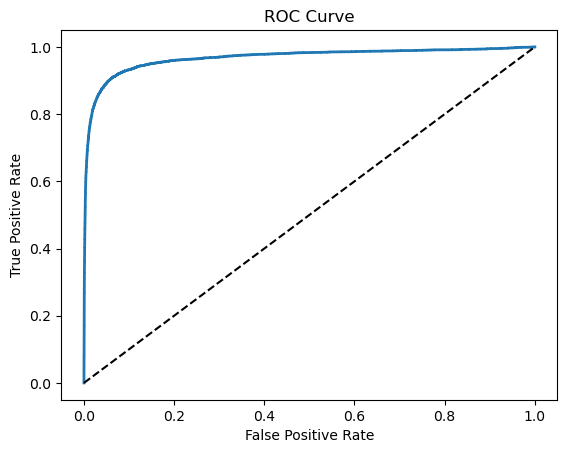

In [63]:
plt.plot(fpr,tpr,linewidth=2)
plt.plot([0 , 1], [0 , 1], 'k--')
#Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [67]:
roc_auc = roc_auc_score(y_train_5,y_scores)
print(f"ROC AUC Score:{roc_auc}")

ROC AUC Score:0.9672937302210262


In [69]:
#Train classifier for all Digits(0-9)
sgd_clf.fit(X_train,y_train)
print(sgd_clf.predict([some_digit]))

[5]


In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(float))
X_test_scaled = scaler.transform(X_test.astype(float))


In [73]:
sgd_clf.fit(X_train_scaled,y_train)
print(sgd_clf.predict([some_digit]))

[3]
